In [3]:
import wbgapi as wb
import pandas as pd
import statistics as stats

In [ ]:
country_map = wb.economy.DataFrame().reset_index()

In [ ]:
country_map = country_map[['id', 'name', 'incomeLevel']]

In [ ]:
country_map

In [ ]:
country_map.reset_index(inplace=True)

country_map.head()

In [ ]:
country_map = country_map[['id','name','incomeLevel']]
country_map.head()

In [4]:
# lookup for the indicators available in the library
wb.series.info()

id,value
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 meters (sq. km)


In [ ]:
selected_indicators = ['NY.GDP.MKTP.CD', 'ST.INT.RCPT.CD', 'ST.INT.ARVL','SP.POP.TOTL']
selected_countries = ['USA', 'MEX', 'FRA', 'ITA', 'JPN', 'THA']

In [ ]:
data = wb.data.DataFrame(
    selected_indicators,
    selected_countries,
    time=range(2000, 2021)
)

In [ ]:
data

In [ ]:
data.index

In [ ]:
data.loc[[('FRA','ST.INT.ARVL')]].mean(axis=1).values[0]

In [ ]:
data.loc[[('FRA','ST.INT.RCPT.CD')]].mean(axis=1).values[0]

In [ ]:
type(data.loc[[('FRA','ST.INT.RCPT.CD')]])

In [ ]:
data.loc[[('FRA','ST.INT.ARVL')]]["YR2000"].isna()

In [ ]:
def ratiofill(fill_df, ref_df):
    """
    fill missing values in fill_df using the ratio of ref_df
    The ratio is calculated as the mean of the values in ref_df
    for each year, and then applied to fill_df.
    """

    # find the ratio of the reference dataframe
    ratio = fill_df.mean(axis=1).values[0]/ref_df.mean(axis=1).values[0]

    # find and fill the NaN values
    for column in fill_df.columns:
        if fill_df[column].isna().values[0]:
            fill_df[column].values[0] = ref_df[column].values[0] * ratio

    return fill_df.values

In [ ]:
ratiofill(data.loc[[('FRA','ST.INT.ARVL')]], data.loc[[('FRA','ST.INT.RCPT.CD')]])

In [ ]:
data.loc[[('FRA','ST.INT.ARVL')]].values

In [ ]:
# fix the missing values in arrival and tourism receipt of all countries
for country in data.index.levels[0]:
    data.loc[[(country, 'ST.INT.ARVL')]] = ratiofill(
        data.loc[[(country, 'ST.INT.ARVL')]],
        data.loc[[(country, 'ST.INT.RCPT.CD')]]
    )

    data.loc[[(country, 'ST.INT.RCPT.CD')]] = ratiofill(
        data.loc[[(country, 'ST.INT.RCPT.CD')]],
        data.loc[[(country, 'ST.INT.ARVL')]]
    )

In [ ]:
data.index.levels[0]

In [ ]:
data

In [ ]:
data

In [ ]:
# # join the country with income levels
# data = data.merge(country_map, left_on='economy', right_on='id')
# data[data['economy']=='FRA']

In [ ]:
data_long = data.melt(id_vars=['economy','series'],
                     var_name='year',
                     value_name='value')

data_long

In [ ]:
data_long['year'] = data_long['year'].str.replace('YR','').astype(int)
data_long.rename(columns={
    'economy': 'country',
    'series': 'indicator'
})

data_long

In [ ]:
data = pd.read_csv('./data/data.csv')
data

In [ ]:
data = pd.read_csv('./test_data.csv')
data

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
pivot_data = data.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

pivot_data

In [ ]:
pivot_data['rcpt_per_arvl'] = pivot_data['ST.INT.RCPT.CD'] / pivot_data['ST.INT.ARVL']
pivot_data['rcpt_per_gdp'] = pivot_data['ST.INT.RCPT.CD'] / pivot_data['NY.GDP.MKTP.CD']
pivot_data['arvl_per_gdp'] = pivot_data['ST.INT.ARVL'] / pivot_data['NY.GDP.MKTP.CD']

In [ ]:
pivot_data['arvl_per_pop'] = pivot_data['ST.INT.ARVL'] / pivot_data['SP.POP.TOTL']

In [ ]:
pivot_data

In [ ]:
data = pivot_data.melt(id_vars=['country', 'year'],
                       value_vars=['NY.GDP.MKTP.CD','SP.POP.TOTL',
                                   'ST.INT.RCPT.CD', 'ST.INT.ARVL',
                                   'rcpt_per_arvl', 'rcpt_per_gdp',
                                   'arvl_per_gdp'],
                       var_name='indicator',
                       value_name='value')
data

In [ ]:
data_pivot = data.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

In [ ]:
pivot_data.to_csv('./test_data.csv', index=False)

In [ ]:
data.to_csv('test_data.csv', index=False)

In [ ]:
pivot_data

In [ ]:
pivot_data = pivot_data.merge(country_map, left_on='country', right_on='id', how='left')

In [ ]:
#pivot_data.drop(columns=['id'],inplace=True,axis=1)
pivot_data

In [ ]:
pivot_data.drop(columns=['id'], inplace=True, axis=1)

In [ ]:
pivot_data.rename(columns={
    'country': 'country_code',
    'name': 'country_name',
    'incomeLevel': 'income_level'
}, inplace=True)

In [ ]:
pivot_data

In [6]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./data/data.csv')

In [8]:
data.head()

,country_code,year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SP.POP.TOTL,ST.INT.ARVL,ST.INT.RCPT.CD,rcpt_per_arvl,rcpt_per_gdp,arvl_per_pop,country_name,income_level
0,ABW,2000,1.873453e+09,20681.023027,90588.0,1211000.0,8.500000e+08,701.899257,0.453708,13.368217,Aruba,HIC
1,ABW,2001,1.896457e+09,20740.132583,91439.0,1178000.0,8.250000e+08,700.339559,0.435022,12.882906,Aruba,HIC
2,ABW,2002,1.961844e+09,21307.248251,92074.0,1225000.0,8.350000e+08,681.632653,0.425620,13.304516,Aruba,HIC
3,ABW,2003,2.044112e+09,21949.485996,93128.0,1184000.0,8.581000e+08,724.746601,0.419791,12.713684,Aruba,HIC
4,ABW,2004,2.254831e+09,23700.631990,95138.0,1304000.0,1.057000e+09,810.582822,0.468771,13.706405,Aruba,HIC


In [9]:
data.columns

Index(['country_code', 'year', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD',
       'SP.POP.TOTL', 'ST.INT.ARVL', 'ST.INT.RCPT.CD', 'rcpt_per_arvl',
       'rcpt_per_gdp', 'arvl_per_pop', 'country_name', 'income_level'],
      dtype='object')

In [15]:
data_nums = data[['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD',
       'SP.POP.TOTL', 'ST.INT.ARVL', 'ST.INT.RCPT.CD', 'rcpt_per_arvl',
       'rcpt_per_gdp', 'arvl_per_pop']]

data_nums.rename(columns={
    'NY.GDP.MKTP.CD': 'Nominal GDP',
    'NY.GDP.PCAP.CD': 'GDP per Capita',
    'SP.POP.TOTL': 'Population',
    'ST.INT.ARVL': 'International Tourism Arrivals',
    'ST.INT.RCPT.CD': 'International Tourism Receipt',
    'rcpt_per_arvl': 'Receipt per Arrival',
    'rcpt_per_gdp': 'Receipt per GDP',
    'arvl_per_pop': 'Arrivals per Population'
}, inplace=True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_25972\697338802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nums.rename(columns={


<Axes: title={'center': 'correlation of international Tourism Indicators'}>

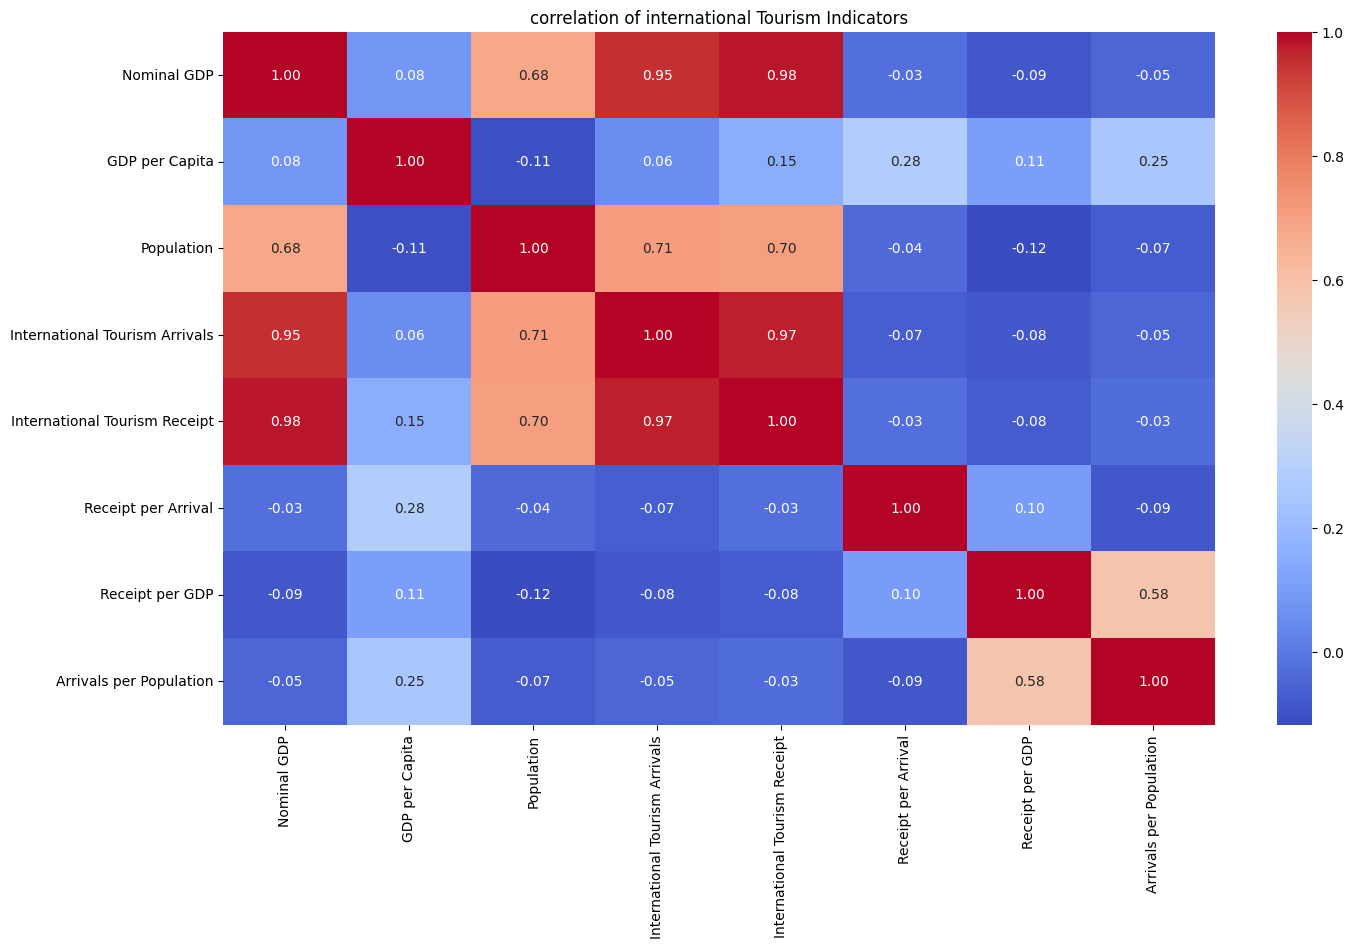

In [19]:
plt.figure(figsize=(16,9))
plt.title("correlation of international Tourism Indicators")
sns.heatmap(data_nums.corr(),annot=True,cmap='coolwarm',fmt='.2f')